In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4928,spam,Got what it takes 2 take part in the WRC Rally...,NaN,NaN,NaN
5117,ham,Aslamalaikkum....insha allah tohar beeen muht ...,NaN,NaN,NaN
4857,ham,Ok...,NaN,NaN,NaN
2822,ham,Then u ask darren go n pick u lor... But i oso...,NaN,NaN,NaN
5475,ham,Dhoni have luck to win some big title.so we wi...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2841,ham,aathi..where are you dear..
319,ham,"Coffee cake, i guess..."
3775,ham,Ok lor. Msg me b4 u call.
3246,ham,* You gonna ring this weekend or wot?
4011,ham,Discussed with your mother ah?


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3826,spam,Congratulations U can claim 2 VIP row A Ticket...
4455,ham,If you want to mapquest it or something look u...
1694,ham,ÌÏ eatin later but i'm eatin wif my frens now ...
3549,ham,Dad wanted to talk about the apartment so I go...
308,spam,TheMob> Check out our newest selection of cont...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

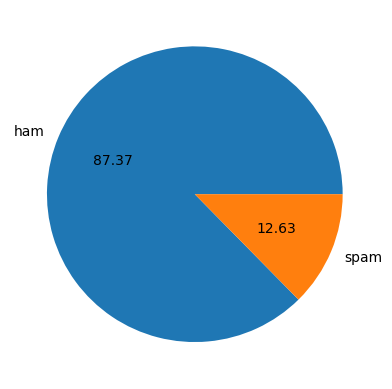

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced so
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ankita
[nltk_data]     Konar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [27]:
df['num_sentences'] = df['text'].apply(lambda x: len(str(x).split('.')))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

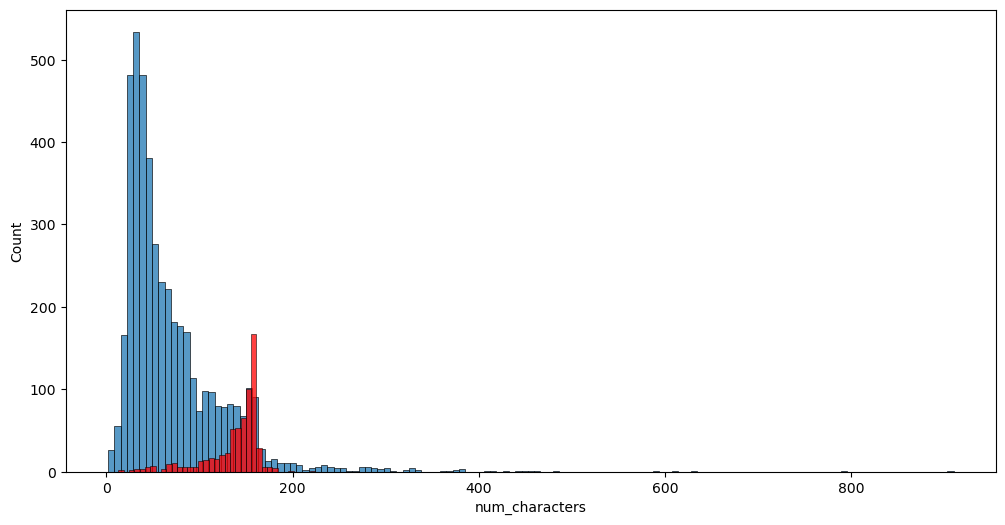

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

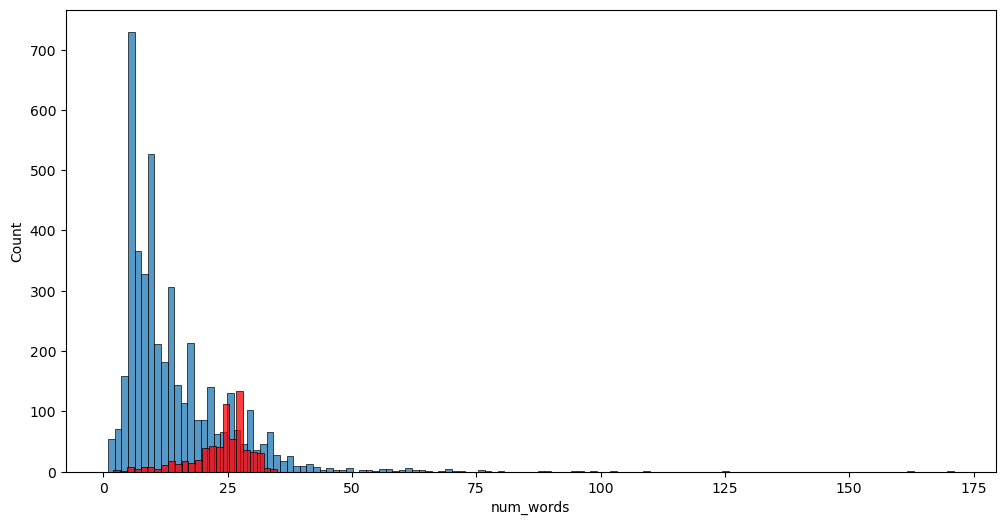

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

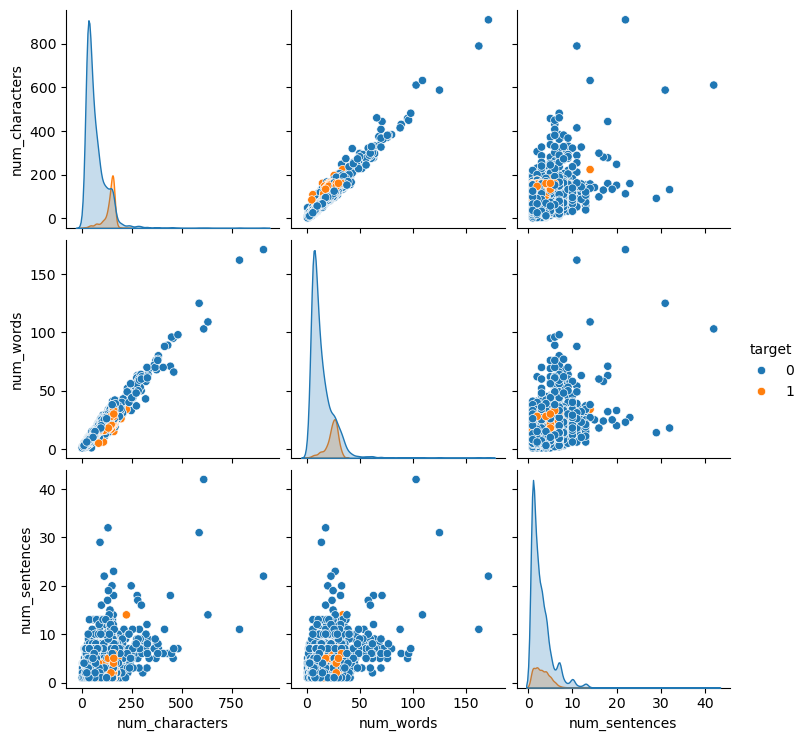

In [35]:
sns.pairplot(df,hue='target')

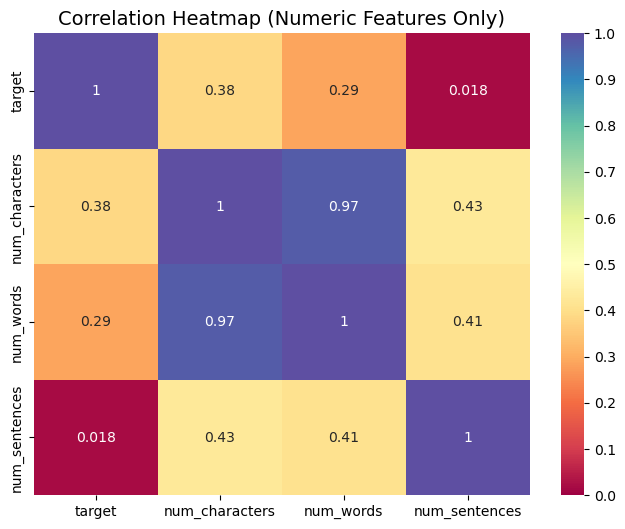

In [36]:
numeric_df = df.select_dtypes(include='number')

# Step 2: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    vmin=0.0, vmax=1.0,
    cbar_kws={'ticks': np.arange(0.0, 1.1, 0.1)},
    cmap='Spectral'  # You can also try 'magma', 'coolwarm', 'viridis', etc.
)
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=14)
plt.show()

# 3. Data Preprocessing

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ankita
[nltk_data]     Konar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords

In [39]:
# Check if it loads without error
print(stopwords.words('english')[:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [40]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    # Lowercase
    text = text.lower()

    # Tokenization using regex instead of nltk.word_tokenize
    words = re.findall(r'\b\w+\b', text)

    # Remove stopwords
    filtered = [word for word in words if word not in stopwords.words('english')]

    # Stemming
    stemmed = [ps.stem(word) for word in filtered]

    return " ".join(stemmed)

# Example usage
output = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(output)

gonna home soon want talk stuff anymor tonight k cri enough today


In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [45]:
!pip install wordcloud

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

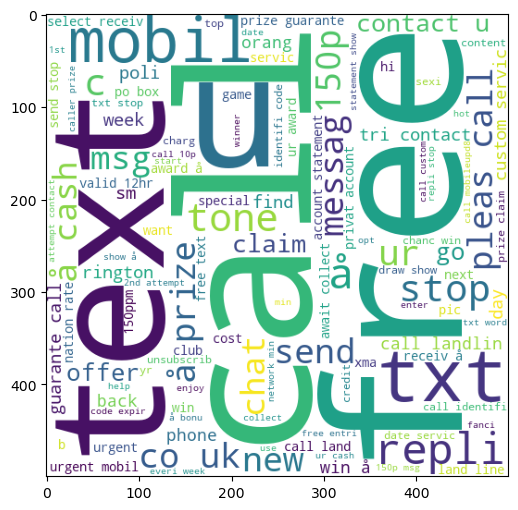

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

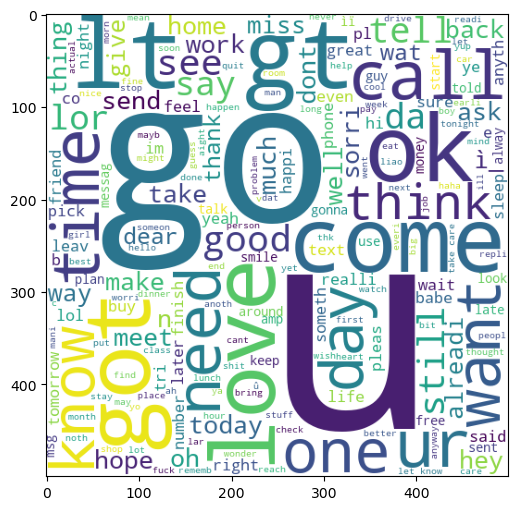

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

11996

C:\Users\Ankita Konar\AppData\Local\Temp\ipykernel_20164\3710697476.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=common_words, palette=rainbow_colors)


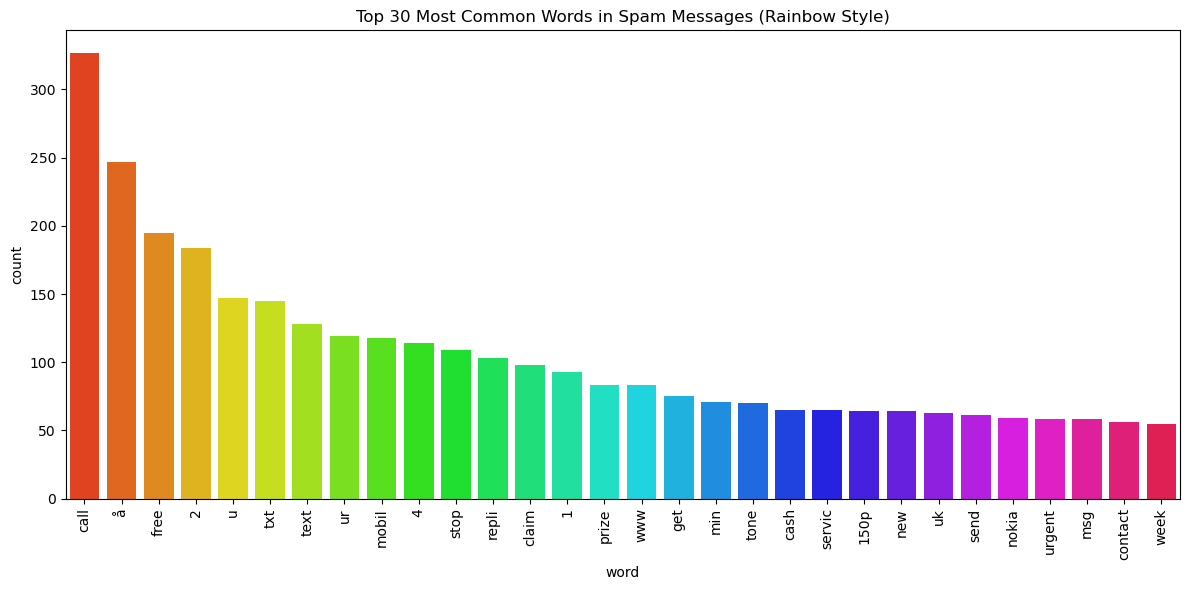

In [54]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create rainbow-style color palette
rainbow_colors = sns.color_palette("hsv", len(common_words))  # hsv gives rainbow hues

# Plot with colorful bars
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=common_words, palette=rainbow_colors)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages (Rainbow Style)")
plt.tight_layout()
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

36510

C:\Users\Ankita Konar\AppData\Local\Temp\ipykernel_20164\2485353436.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=ham_words_df, palette=color_palette)


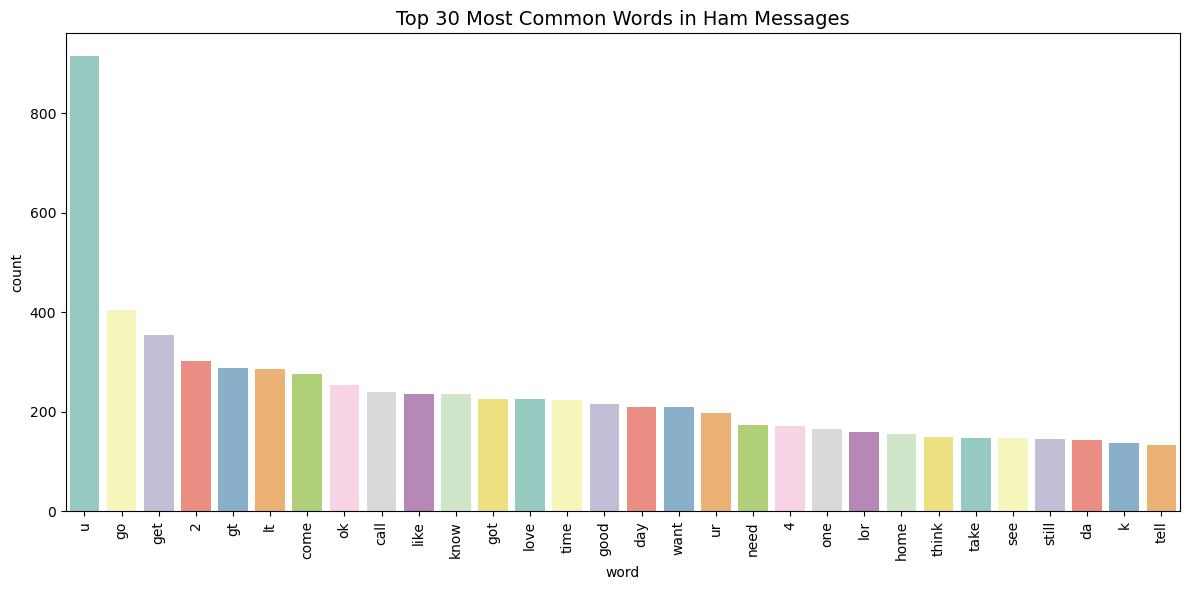

In [57]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of top 30 words
ham_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Use a distinct qualitative color palette (like Set3 or Paired)
color_palette = sns.color_palette("Set3", n_colors=len(ham_words_df))  # pastel but diverse colors

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=ham_words_df, palette=color_palette)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages", fontsize=14)
plt.tight_layout()
plt.show()

In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


# 4. Model Building 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

87.71760154738878
[[790 106]
 [ 21 117]]
0.5246636771300448


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

97.678916827853
[[896   0]
 [ 24 114]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

98.74274661508704
[[895   1]
 [ 12 126]]
0.9921259842519685


In [70]:
!pip install xgboost

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy*100)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  97.58220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  90.42553191489363
Precision -  1.0
For  NB
Accuracy -  97.678916827853
Precision -  1.0
For  DT
Accuracy -  93.32688588007737
Precision -  0.8165137614678899
For  LR
Accuracy -  96.0348162475822
Precision -  0.9619047619047619
For  RF
Accuracy -  97.48549323017409
Precision -  0.9745762711864406


C:\Users\Ankita Konar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  96.80851063829788
Precision -  0.9487179487179487
For  BgC
Accuracy -  95.74468085106383
Precision -  0.8405797101449275
For  ETC
Accuracy -  97.96905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  95.06769825918762
Precision -  0.9484536082474226
For  xgb
Accuracy -  97.678916827853
Precision -  0.9523809523809523


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.976789,1.000000
8,ETC,0.979691,0.975610
0,SVC,0.975822,0.974790
5,RF,0.974855,0.974576
4,LR,0.960348,0.961905
10,xgb,0.976789,0.952381
6,AdaBoost,0.968085,0.948718
9,GBDT,0.950677,0.948454
7,BgC,0.957447,0.840580


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.976789
2,ETC,Accuracy,0.979691
3,SVC,Accuracy,0.975822
4,RF,Accuracy,0.974855
5,LR,Accuracy,0.960348
6,xgb,Accuracy,0.976789
7,AdaBoost,Accuracy,0.968085
8,GBDT,Accuracy,0.950677
9,BgC,Accuracy,0.957447


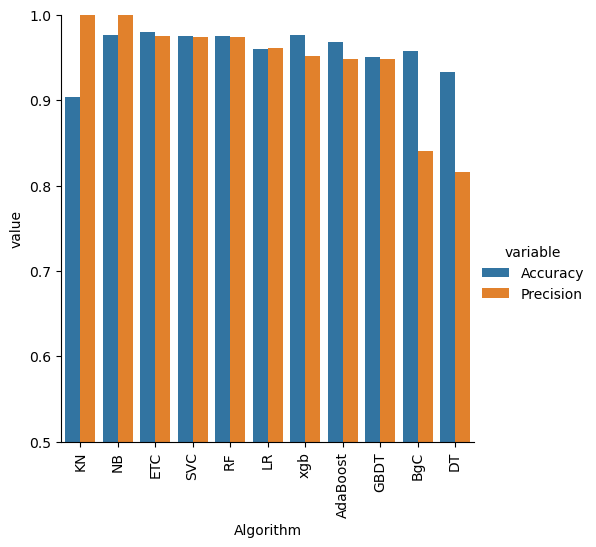

In [82]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
     

In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,RF,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905
6,xgb,0.976789,0.952381,0.976789,0.952381,0.976789,0.952381,0.976789,0.952381
7,AdaBoost,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
8,GBDT,0.950677,0.948454,0.950677,0.948454,0.950677,0.948454,0.950677,0.948454
9,BgC,0.957447,0.840580,0.957447,0.840580,0.957447,0.840580,0.957447,0.840580


In [89]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [90]:
from sklearn.ensemble import VotingClassifier

In [91]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [92]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [93]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [94]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.984


In [95]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [98]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9694656488549618


In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [100]:
# Preprocessing + Transformation
X = df['text'].apply(transform_text)
tfidf = TfidfVectorizer(max_features=3000)
X_vectorized = tfidf.fit_transform(X)

In [101]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, df['target'], test_size=0.2, random_state=42)

In [102]:
# Train model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [103]:
MultinomialNB()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

SyntaxError: invalid syntax (2793742465.py, line 2)

In [ ]:
import pickle
# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

# Save the TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)